In [4]:
import torch
import numpy as np

In [5]:
def gennp(shape, center, deviation):
        x, y = np.indices(shape)
        y_center, x_center = center
        exponent = -((x - x_center)**2 / (2 * deviation[1]**2) + (y - y_center)**2 / (2 * deviation[0]**2))
        gaussian_kernel = np.exp(exponent)
        return gaussian_kernel


def gentorch(shape, center, deviation):
    x, y = torch.meshgrid(torch.arange(shape[0]), torch.arange(shape[1]))
    y_center, x_center = center
    exponent = -((x - x_center)**2 / (2 * deviation[1]**2) + (y - y_center)**2 / (2 * deviation[0]**2))
    gaussian_kernel = torch.exp(exponent)
    return gaussian_kernel


In [6]:
shape = (100,200)
center = (50, 60)
deviation = (10,30)

In [7]:
n = gennp(shape,center,deviation)
t = gentorch(shape,center,deviation)

/ari/users/madiyaman/.conda/envs/compare/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [8]:
n

array([[5.04347663e-07, 8.27381452e-07, 1.34381228e-06, ...,
        1.61459550e-48, 3.69385104e-49, 8.36665907e-50],
       [5.38817513e-07, 8.83929182e-07, 1.43565569e-06, ...,
        1.72494571e-48, 3.94630883e-49, 8.93848186e-50],
       [5.75003972e-07, 9.43293003e-07, 1.53207292e-06, ...,
        1.84079138e-48, 4.21133908e-49, 9.53878158e-50],
       ...,
       [1.74186260e-06, 2.85752253e-06, 4.64111669e-06, ...,
        5.57631915e-48, 1.27574320e-48, 2.88958820e-49],
       [1.67077624e-06, 2.74090549e-06, 4.45171019e-06, ...,
        5.34874654e-48, 1.22367942e-48, 2.77166254e-49],
       [1.60081129e-06, 2.62612810e-06, 4.26529164e-06, ...,
        5.12476394e-48, 1.17243697e-48, 2.65559718e-49]])

In [9]:
t

tensor([[5.0435e-07, 8.2738e-07, 1.3438e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.3882e-07, 8.8393e-07, 1.4357e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.7500e-07, 9.4329e-07, 1.5321e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.7419e-06, 2.8575e-06, 4.6411e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.6708e-06, 2.7409e-06, 4.4517e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.6008e-06, 2.6261e-06, 4.2653e-06,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [10]:
import matplotlib.pyplot as plt

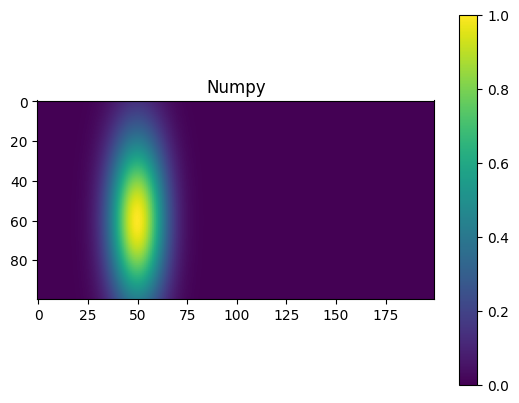

In [11]:
def show2dnumpy(nim):
    plt.imshow(nim, cmap='viridis', origin='upper')
    plt.colorbar()
    plt.title('Numpy')
    plt.show()

def show2dtorch(tim):
    plt.imshow(tim, cmap='viridis', origin='upper')
    plt.colorbar()
    plt.title('Numpy')
    plt.show()

show2dnumpy(n)

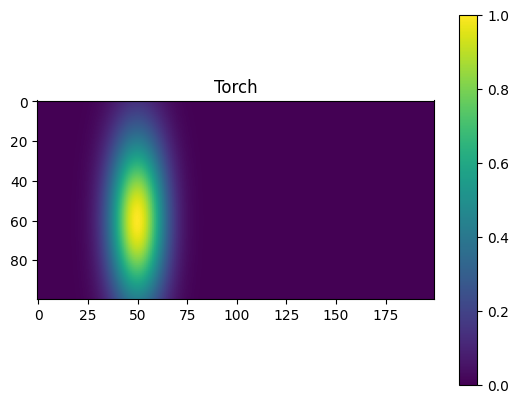

In [12]:
plt.imshow(t.numpy(), cmap='viridis', origin='upper')
plt.colorbar()
plt.title('Torch')
plt.show()

In [13]:
def generate_2d_gaussian_kernel(shape, center, deviation):
    x, y = torch.meshgrid([torch.arange(0, shape[0]), torch.arange(0, shape[1])])
    y_center, x_center = center
    exponent = -((x - x_center)**2 / (2 * deviation[1]**2) + (y - y_center)**2 / (2 * deviation[0]**2))
    gaussian_kernel = torch.exp(exponent)
    return gaussian_kernel

def getcenterfield(mask):
    if not mask.any():
        return torch.zeros_like(mask)
    
    positive_indices = torch.where(mask)
    min_row, min_col = torch.min(positive_indices[0]),torch.min(positive_indices[1])
    max_row, max_col = torch.max(positive_indices[0]),torch.max(positive_indices[1])
    center = ((min_col + max_col) // 2, (min_row + max_row) // 2)
    width = max_col - min_col + 1
    height = max_row - min_row + 1

    deviation = (width / 3, height / 3)
    kernel = generate_2d_gaussian_kernel(mask.shape, center, deviation)
    filtered_mask = kernel * mask
    return filtered_mask

def getdistancefield(mask):
    if not mask.any():
        distances_x = torch.zeros_like(mask)
        distances_y = torch.zeros_like(mask)
        distances = torch.stack((distances_x, distances_y), dim=-1)
        return distances

    positive_indices = torch.where(mask)
    min_row, min_col = torch.min(positive_indices[0]),torch.min(positive_indices[1])
    max_row, max_col = torch.max(positive_indices[0]),torch.max(positive_indices[1])

    center_row = (min_row + max_row) // 2
    center_col = (min_col + max_col) // 2

    width = max_col - min_col + 1
    height = max_row - min_row + 1

    rows, cols = torch.meshgrid([torch.arange(0, mask.shape[0]), torch.arange(0, mask.shape[1])])
    distances_x = (cols - center_col) / (width + 1)
    distances_y = (rows - center_row) / (height + 1)

    distances = torch.stack((distances_x, distances_y), dim=-1)
    masked_tensor = distances * mask.unsqueeze(-1)
    return masked_tensor

def getfields(mask):
    distancefield = getdistancefield(mask)
    centerfield = getcenterfield(mask)
    return torch.cat((distancefield, centerfield.unsqueeze(-1)), dim=-1)

def getfields_classwise(masks, labels):
    thinglabels = [0, 1, 2, 3, 4, 5, 6, 7]
    dummy = getfields(masks[0]) * 0.0
    fields = {i: torch.zeros_like(dummy) for i in thinglabels}
    for label, mask in zip(labels, masks):
        fields[int(label)] += getfields(mask)
    out_tensor = torch.cat(tuple(fields.values()), dim=-1).permute(2,0,1)
    return out_tensor

In [14]:
mask = torch.zeros((100, 200), dtype=torch.bool)
mask[30:70, 20:90] = True

In [15]:
cf = getfields(mask)

In [26]:
cf.shape

torch.Size([100, 200, 3])

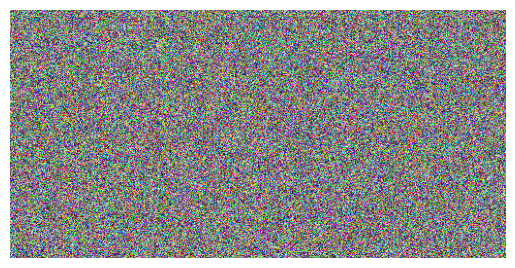

In [24]:
import torch
import matplotlib.pyplot as plt

def visualize_tensor3d(tensor):
    # Normalize tensor values to 0-255 range
    normalized_tensor = torch.zeros_like(tensor)
    for c in range(tensor.shape[2]):
        channel = tensor[:,:,c]
        min_val = channel.min()
        max_val = channel.max()
        normalized_channel = (channel - min_val) / (max_val - min_val) * 255
        normalized_tensor[:,:,c] = normalized_channel
    
    # Convert to numpy array and transpose for channel-last format
    image = normalized_tensor.numpy().astype('uint8')
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example 3D tensor with random values
channels = 3
height = 256
width = 512
random_tensor = torch.rand(height, width, channels)

# Visualize the tensor
visualize_tensor(random_tensor)



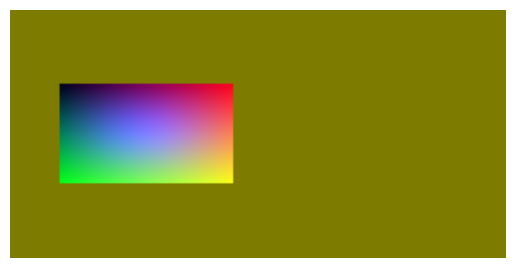

In [25]:
visualize_tensor3d(cf)

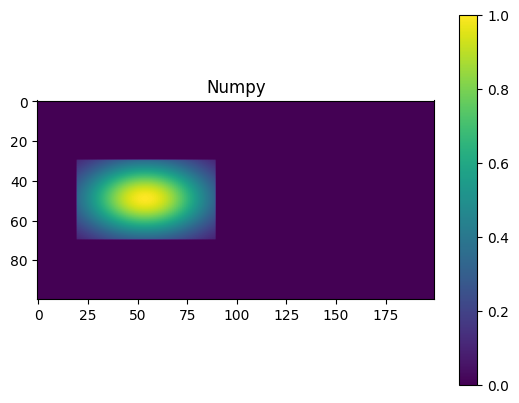

In [29]:
show2dtorch(cf[:,:,2])